# <font color='gren'>Exercício 5

## **1-Imports Necessários**

In [36]:
import numpy as np
from numpy import random

import scipy
from scipy import linalg
from scipy.sparse import diags, linalg

import matplotlib.pylab as plt
from mpl_toolkits import mplot3d
from matplotlib import cm

import time

import random

## **2-Funções auxiliares**

* Função para plotar os curvas de nível constante de temperatura

In [37]:

def PlotaMembrane(N1,N2,L1,L2,W):
    x = np.linspace(0, L1, N1)
    y = np.linspace(0, L2, N2)
    X,Y=np.meshgrid(x,y)
    Z = np.copy(W)
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.set(xlabel='x', ylabel='y', title='Deslocamento vertical')
    im = ax.contourf(X, Y, Z, 20)
    im2 = ax.contour(X, Y, Z, 20, linewidths=0.25, colors='k')
    fig.colorbar(im, ax=ax)
    plt.show()
    
def PlotaSurface(N1,N2,L1,L2,W):
    x = np.linspace(0, L1, N1)
    y = np.linspace(0, L2, N2)
    X,Y=np.meshgrid(x,y)
    Z = np.copy(W)
    ax = plt.axes(projection ='3d')
    ax.plot_surface(X, Y, Z,cmap='viridis', edgecolor='none')
    ax.set(xlabel='x', ylabel='y', title='Deslocamento vertical')
    ax.set_zlim(-1.01, 1.01)
    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,linewidth=0, antialiased=False)
    

* Montagem das matrizes K e M modificada para placa circular de raio R

In [38]:
def ij2n (i, j, N):
    return i + j*N

def BuildMatrizesEigen(N, R, sigma, rho, e, delta):
    nunk = N*N

    # Stiffness matrix K: Build it as a sparse matrix 
    d1 = 4.0*np.ones(nunk)
    d2 = -np.ones(nunk-1)
    d3 = -np.ones(nunk-N)
    K = (sigma/delta**2)*scipy.sparse.diags([d3, d2, d1, d2, d3], [-N, -1, 0, 1, N], format='csr')

    # Force the eigenvalues associated to boundary points 
    # to be a big number as compared to fundamental modes
    big_number = 10000
    Iden = big_number*scipy.sparse.identity(nunk, format='csr')


    for i in range(N):
        for j in range(N):
            if(( i-(N-1)/2 )**2  +  ( j-(N-1)/2 )**2 == ((N-1)/2)**2):
                Ic=ij2n(i,j,N)
                K[Ic,:],K[:,Ic]=Iden[Ic,:],Iden[:,Ic]
            if(( i-(N-1)/2 )**2  +  ( j-(N-1)/2 )**2 > ((N-1)/2)**2):
                Ic=ij2n(i,j,N)
                K[Ic,:],K[:,Ic]=0 , 0

    # Mass matrix: Simple case, multiple of identity
    M = rho*e*(scipy.sparse.identity(nunk, format='csr'))
    
    return K, M    




## **4-Resultados**

* Pré-setagem

In [39]:
R=0.5
L=2*R
N=41
delta=L/(N-1)
K,M=BuildMatrizesEigen(N, R, 1, 1, 1, delta)


* Cálculo de modos fundamentais e frequẽncias naturais

In [40]:

Lam,Q=scipy.sparse.linalg.eigsh(K, k=41, M=M, which='SM')
omegas=np.sqrt(Lam)


Modos escolhido: [0. 0. 0. ... 0. 0. 0.]

Frequencias: [ 4.74059987  7.54800032  7.54800032 10.09901017 10.11520836 10.86004988
 12.54187416 12.54187416 13.78151296 13.78151296 14.86235245 14.9313353
 16.50354303 16.50783852 16.96438528 17.19160454 17.19160454 19.10367896
 19.10367896 19.34904512 19.53684224 19.89662026 19.89662026 21.56144349
 21.64465037 21.65154162 21.65154162 22.64999597 22.68606765 22.99087281
 23.82915155 23.84120668 24.03981362 24.03981362 25.2971852  25.2971852
 25.88382702 25.88382702 26.01704087 26.01704087 26.27638591] 



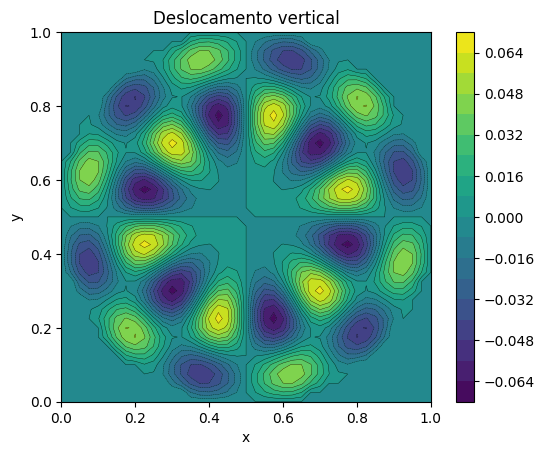

In [42]:

# Plotar Escolher modo
k = 40
mode = Q[:,k]
print('\nModos escolhido:',mode)
mode[np.where(np.abs(mode) < 1e-10)] = 0.0
print('\nFrequencias:', omegas,'\n')

Wplot = mode.reshape(N,N)
PlotaMembrane(N,N,L,L,Wplot)